In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import igraph as ig
import numpy as np
import collections
import itertools
import string
import re

In [2]:
langs = [path.split('xml\\')[1].split('.xml')[0] for path in glob('xml/*.xml')]
books = ['MAT', 'MAR', 'LUK', 'JOH']

In [3]:
for lang in []:#langs:
    print(lang)
    root = ET.fromstring(open(f'xml/{lang}.xml', encoding='utf-8').read())
    with open(f'txt/{lang}.txt', 'w', encoding='utf-8') as out:        
        for book in books:
            for seg in root.findall(f'.//div[@id="b.{book}"]/*seg'):             
                out.write("".join(seg.itertext()).strip(" 1234567890-").strip() + '\n')

In [4]:
for lang in []:#langs:
    print(lang)
    ids = collections.defaultdict(itertools.count().__next__)
    edges = set()
    words = []
    with open(f'txt/{lang}.txt', 'r', encoding='utf-8') as f:
        for line in f:
            words.extend(re.sub('[^\w ]', '', line.lower().replace('&quot;', '')).split(' '))    
    for i, j in zip(words, words[1:]):
        source, target = ids[i], ids[j]
        if ((source, target) not in edges) and ((target, source) not in edges):
            edges.add((source, target))
    n = list(ids.values())[-1] + 1

    g = ig.Graph()
    g.add_vertices(n)
    g.add_edges(edges)
    g.save(f'net/{lang}.net')

In [5]:
metrics = {
    "vcount": ig.Graph.vcount,
    "ecount": ig.Graph.ecount,
    "density": ig.Graph.density,
    "transitivity": ig.Graph.transitivity_undirected,
    "assortativity_degree": ig.Graph.assortativity_degree,
    "transitivity_avglocal": ig.Graph.transitivity_avglocal_undirected,
    
    # Slow
    # ig.Graph.average_path_length # 9s
}
meanMetrics = {
    "degree": ig.Graph.degree,    
    "pagerank": ig.Graph.pagerank,
    "coreness": ig.Graph.coreness,
    "hub_score": ig.Graph.hub_score,    
    "constraint": ig.Graph.constraint,
    "feedback_arc_set": ig.Graph.feedback_arc_set,    

    # Duplicated
    # ig.Graph.strength,
    # ig.Graph.authority_score,
    # ig.Graph.personalized_pagerank,
    # ig.Graph.eigenvector_centrality,

    # Slow
    # ig.Graph.closeness,
    # ig.Graph.betweenness,
    # ig.Graph.eccentricity,
    # ig.Graph.similarity_dice,
    # ig.Graph.edge_betweenness,
    # ig.Graph.similarity_jaccard,
    # ig.Graph.similarity_inverse_log_weighted,
}

In [6]:
rows = []
for lang in []:#langs:    
    print(lang)
    row = {}
    g = ig.load(f'net\\{lang}.net') 
    for name, metric in metrics.items():
        row[name] = metric(g)
    for name, metric in meanMetrics.items():
        row[name] = np.mean(metric(g))
    rows.append(row)
# df = pd.DataFrame(rows, langs)
# df.to_csv('langs.csv')

In [66]:
df = pd.read_csv('langs.csv', index_col=0)#.sample(frac=1)
df

,abbreviation,genus,subgenus,vcount,ecount,assortativity_degree,density,transitivity,transitivity_avglocal,degree,feedback_arc_set,hub_score,constraint,coreness,pagerank
Afrikaans,afr,Germanic,West,3666,23932,-0.275577,0.003562,0.069499,0.601504,13.056192,11960.508906,0.034571,0.319710,6.815057,0.000273
Bulgarian,bul,Slavic,South,7154,32323,-0.208970,0.001263,0.027109,0.433424,9.036343,16146.117362,0.016668,0.359154,4.677104,0.000140
Croatian,hrv,Slavic,South,8101,35729,-0.176540,0.001089,0.023219,0.376386,8.820886,17882.198125,0.015587,0.354161,4.562029,0.000123
Czech,ces,Slavic,West,8271,36751,-0.133479,0.001075,0.024142,0.335851,8.886713,18407.484182,0.013862,0.355820,4.590013,0.000121
Danish,dan,Germanic,North,4594,27546,-0.213409,0.002611,0.055719,0.510865,11.992164,13790.436370,0.026159,0.331164,6.227253,0.000218
Dutch,nld,Germanic,West,4829,34136,-0.276590,0.002928,0.085661,0.517842,14.137917,17071.287703,0.034491,0.311391,7.405053,0.000207
English,eng,Germanic,West,3482,25302,-0.252740,0.004175,0.069011,0.590653,14.533027,12660.134183,0.035026,0.296585,7.573521,0.000287
French,fra,Italic,Romance,5927,30901,-0.274256,0.001760,0.036567,0.443357,10.427198,15431.069950,0.023696,0.344064,5.382149,0.000169
German,deu,Germanic,West,5010,31101,-0.191878,0.002479,0.056984,0.525448,12.415569,15516.618695,0.024917,0.321916,6.428144,0.000200
Icelandic,isl,Germanic,North,6505,31846,-0.196230,0.001505,0.037380,0.441684,9.791238,15955.649791,0.019522,0.350690,5.044427,0.000154


In [125]:
X = df.drop(columns=['abbreviation', 'genus', 'subgenus'])
y = df['genus'].astype('category').cat.codes.values
#y = (df['genus']+df['subgenus']).astype('category').cat.codes.values

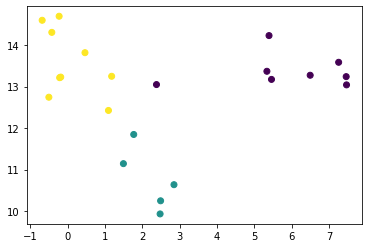

0.5711411078466724
49.031410911567306
0.4864298916026439


In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
# lda = LinearDiscriminantAnalysis()
X2 = lda.fit_transform(X, y)
plt.scatter(X2[:, 0], X2[:, 1], c=y)
plt.show()

print(metrics.silhouette_score(X2, y, random_state=0)) # higher is better
print(metrics.calinski_harabasz_score(X2, y)) # higher is better
print(metrics.davies_bouldin_score(X2, y)) # lower is better

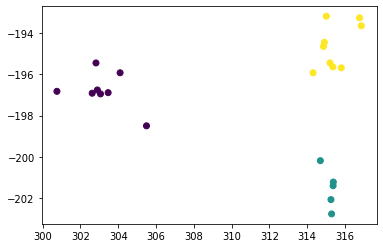

0.7941754940148289
229.5415786573295
0.255308448078937


In [128]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
nca = NeighborhoodComponentsAnalysis(n_components=2, random_state=0)
X2 = nca.fit_transform(X, y)
plt.scatter(X2[:, 0], X2[:, 1], c=y)
plt.show()

print(metrics.silhouette_score(X2, y, random_state=0)) # higher is better
print(metrics.calinski_harabasz_score(X2, y)) # higher is better
print(metrics.davies_bouldin_score(X2, y)) # lower is better

In [70]:
from functools import partial
from time import time

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

n_neighbors = 10
n_components = 2
fig = plt.figure(figsize=(15, 8))
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors=n_neighbors, n_components=n_components, eigen_solver='auto')
methods = {}
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods['MDS'] = manifold.MDS(n_components=n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca', random_state=0)

if False:
#for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    #print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=y)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
#plt.show()
pass

<Figure size 1080x576 with 0 Axes>

[[-8.11038021  9.2359819 ]] [0] [2]


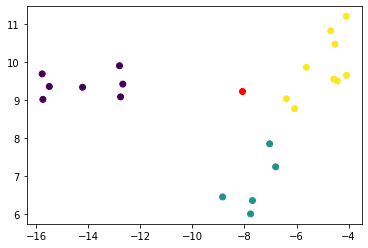

0.9545454545454546
[[7 0 1]
 [0 5 0]
 [0 0 9]]


In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
import warnings

y = df['genus'].astype('category').cat.codes.values
#y = (df['genus']+df['subgenus']).astype('category').cat.codes.values

y_pred = []
for train_index, test_index in LeaveOneOut().split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dimRed = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')    
        X_train = dimRed.fit_transform(X_train, y_train)                
        X_test = dimRed.transform(X_test)

    #clf = RandomForestClassifier(random_state=42, n_jobs=-1)
    clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)    
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    
    y_pred.append(predicted)
    
    if predicted!=y_test:
        print(X_test, y_test, predicted)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
        plt.scatter(X_test[:, 0], X_test[:, 1], c='red')
        plt.show() 
    
print(np.mean([i==j for i,j in zip(y, y_pred)]))
cm = confusion_matrix(y, y_pred)
print(cm)